In [685]:
import ast
import json
import pandas as pd
import numpy as np 
from data_cleaning import WineCleaner
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [188]:
    df = pd.read_csv('../data/scraped_wine_data.csv')
    
    wine = WineCleaner()
    bucket = 'winelabelimages'
    wine.get_image_names(bucket)
    new_df = wine.drop_records_missing_image(df)
    new_df = wine.drop_duplicates(new_df)

/Users/alyse/galvanize/wines/src/data_cleaning.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop_duplicates(subset='name',keep='first',inplace=True)


In [189]:
new_df.shape

(14791, 19)

In [190]:
new_df[new_df.duplicated(['name'])].shape

(0, 19)

In [191]:
new_df[new_df['name']=='Charles Heidsieck Brut Reserve']

,name,url,varietal,origin,rating_dict,avg_rating,rating_count,price_dollars,price_cents,page,red,white,sparking,collectible,giftable,green,screwcap,boutique,in_s3
172,Charles Heidsieck Brut Reserve,/product/charles-heidsieck-brut-reserve/73545,Non-Vintage Sparkling Wine,"Champagne, France","{'TP': '95', 'WW': '94', 'WS': '93', 'WE': '92...",4.1,29.0,61,99,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [196]:
new_df.iloc[[0,-1]]

,name,url,varietal,origin,rating_dict,avg_rating,rating_count,price_dollars,price_cents,page,red,white,sparking,collectible,giftable,green,screwcap,boutique,in_s3
3,Chateau Cote de Baleau 2015,/product/chateau-cote-de-baleau-2015/158294,Bordeaux Red Blends,"St. Emilion, Bordeaux, France","{'RP': '94', 'WS': '92', 'JS': '92'}",4.4,20.0,31,99,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [125]:
new_df['rating_dict'].replace('NaN','{}',inplace = True)
new_df['rating_dict'].replace('','{}',inplace = True)
new_df['rating_dict'] = new_df.rating_dict.fillna('{}')
new_df['rating_dict']=new_df['rating_dict'].apply(ast.literal_eval)

type(new_df.iloc[1,4])

dict

In [127]:
ratings = new_df['rating_dict'].apply(pd.Series)

In [137]:
new_df = pd.concat([new_df, ratings], axis=1)
new_df

,name,url,varietal,origin,rating_dict,avg_rating,rating_count,price_dollars,price_cents,page,...,WE,WW,TP,TA,W&S,V,CG,BH,PR,ST
3,Chateau Cote de Baleau 2015,/product/chateau-cote-de-baleau-2015/158294,Bordeaux Red Blends,"St. Emilion, Bordeaux, France","{'RP': '94', 'WS': '92', 'JS': '92'}",4.4,20.0,31,99,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chateau Sansonnet 2015,/product/chateau-sansonnet-2015/400828,Bordeaux Red Blends,"St. Emilion, Bordeaux, France","{'JS': '96', 'JD': '94', 'WS': '92', 'RP': '92...",4.0,14.0,39,99,2.0,...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Chateau Pichon-Longueville Baron 2016,/product/chateau-pichon-longueville-baron-2016...,Bordeaux Red Blends,"Pauillac, Bordeaux, France","{'JS': '99', 'RP': '97', 'WE': '97', 'JD': '97...",4.6,7.0,179,99,2.0,...,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Foxen Bien Nacido Block Eight Pinot Noir 2015,/product/foxen-bien-nacido-block-eight-pinot-n...,Pinot Noir,"Santa Maria Valley, Central Coast, California","{'WE': '96', 'RP': '93', 'JD': '92'}",4.3,6.0,64,99,2.0,...,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Chateau Malartic-Lagraviere 2014,/product/chateau-malartic-lagraviere-2014/142829,Bordeaux Red Blends,"Pessac-Leognan, Bordeaux, France","{'WE': '96', 'JS': '94', 'D': '93', 'WW': '93'...",4.3,8.0,54,99,2.0,...,96,93,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hall Eighteen Seventy-Three Cabernet Sauvignon...,/product/hall-eighteen-seventy-three-cabernet-...,Cabernet Sauvignon,"Napa Valley, California","{'WW': '98', 'WE': '95'}",4.4,71.0,80,\n,2.0,...,95,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,La Posta Pizzella Family Vineyard Malbec 2017,/product/la-posta-pizzella-family-vineyard-mal...,Malbec,"Mendoza, Argentina","{'JS': '93', 'RP': '90', 'TA': '90'}",3.9,19.0,18,\n,2.0,...,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN
10,Numanthia Termes 2015,/product/numanthia-termes-2015/506070,Tempranillo,"Toro, Spain","{'JS': '94', 'RP': '90'}",4.1,20.0,25,99,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Mount Eden Vineyards Estate Cabernet Sauvignon...,/product/mount-eden-vineyards-estate-cabernet-...,Cabernet Sauvignon,"Santa Cruz Mountains, California","{'JD': '97', 'D': '96', 'W&S': '96', 'WW': '92...",4.8,6.0,79,99,2.0,...,92,92,NaN,NaN,96,NaN,NaN,NaN,NaN,NaN
12,Chateau Pontet-Canet 2015,/product/chateau-pontet-canet-2015/153356,Bordeaux Red Blends,"Pauillac, Bordeaux, France","{'JS': '98', 'V': '97', 'WE': '97', 'RP': '96'...",4.1,14.0,139,99,2.0,...,97,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN


In [140]:
new_df.drop(['rating_dict'],axis=1,inplace=True)

In [142]:
new_df.columns

Index(['name', 'url', 'varietal', 'origin', 'avg_rating', 'rating_count',
       'price_dollars', 'price_cents', 'page', 'red', 'white', 'sparking',
       'collectible', 'giftable', 'green', 'screwcap', 'boutique', 'in_s3',
       'RP', 'WS', 'JS', 'JD', 'D', 'WE', 'WW', 'TP', 'TA', 'W&S', 'V', 'CG',
       'BH', 'PR', 'ST', 'RP', 'WS', 'JS', 'JD', 'D', 'WE', 'WW', 'TP', 'TA',
       'W&S', 'V', 'CG', 'BH', 'PR', 'ST'],
      dtype='object')

In [160]:
rating_col =  ['RP', 'WS', 'JS', 'JD', 'D', 'WE', 'WW', 'TP', 'TA', 'W&S', 'V', 'CG',
       'BH', 'PR', 'ST', 'RP', 'WS', 'JS', 'JD', 'D', 'WE', 'WW', 'TP', 'TA',
       'W&S', 'V', 'CG', 'BH', 'PR', 'ST']
counts = []

for i in rating_col:
    print(new_df[i].count())

RP    3302
RP    3302
dtype: int64
WS    2794
WS    2794
dtype: int64
JS    2964
JS    2964
dtype: int64
JD    1209
JD    1209
dtype: int64
D    1073
D    1073
dtype: int64
WE    2348
WE    2348
dtype: int64
WW    798
WW    798
dtype: int64
TP    206
TP    206
dtype: int64
TA    273
TA    273
dtype: int64
W&S    660
W&S    660
dtype: int64
V    541
V    541
dtype: int64
CG    59
CG    59
dtype: int64
BH    246
BH    246
dtype: int64
PR    1
PR    1
dtype: int64
ST    4
ST    4
dtype: int64
RP    3302
RP    3302
dtype: int64
WS    2794
WS    2794
dtype: int64
JS    2964
JS    2964
dtype: int64
JD    1209
JD    1209
dtype: int64
D    1073
D    1073
dtype: int64
WE    2348
WE    2348
dtype: int64
WW    798
WW    798
dtype: int64
TP    206
TP    206
dtype: int64
TA    273
TA    273
dtype: int64
W&S    660
W&S    660
dtype: int64
V    541
V    541
dtype: int64
CG    59
CG    59
dtype: int64
BH    246
BH    246
dtype: int64
PR    1
PR    1
dtype: int64
ST    4
ST    4
dtype: int64


In [165]:
new_df.varietal.unique()

array(['Bordeaux Red Blends', 'Pinot Noir', 'Cabernet Sauvignon',
       'Malbec', 'Tempranillo', 'Rosé Sparkling Wine', 'Tannat',
       'Vintage Sparkling Wine', 'Other White Wine',
       'Non-Vintage Sparkling Wine', 'Gamay', 'Riesling',
       'Other Red Blends', 'Rosé', 'Syrah/Shiraz', 'Torrontes',
       'Sangiovese', 'Port', 'Zinfandel', 'Bordeaux White Blends',
       'Rhone Red Blends', "Nero d'Avola", 'Petite Sirah',
       'Other Dessert', 'Sauvignon Blanc', 'Chardonnay', 'Sherry',
       'Gewurztraminer', 'Merlot', 'Lambrusco', 'Chenin Blanc',
       'Nebbiolo', 'Grenache', 'Other White Blends', 'Tuscan Blends',
       'Barbera', 'Dolcetto', 'Garganega', 'Rhone White Blends',
       'Albarino', 'Marsanne', 'Fruit Wine', 'Cabernet Franc',
       'Gruner Veltliner', 'Petit Verdot', 'Vermentino', 'Carmenere',
       'Melon de Bourgogne', 'Mourvedre', 'Godello', 'Mencia',
       'Pinot Gris/Grigio', 'Muscat', 'Cortese', 'Semillon', 'Bonarda',
       'Montepulciano', 'Arneis', 

In [172]:
mask = new_df['varietal'].isin(['Stemware & Decanters',
       'In Box Glassware', 'Serve & Preserve', 
       'Mixed Collections', 'Corkscrews', 
       'In Box Accessory', 'Entertaining', 
       'Wine Chillers', 'Wine Storage'])

In [185]:
new_df = new_df[~mask].shape

In [207]:
new_df['price_cents'].replace('\n','00',inplace = True)

In [208]:
new_df.head(30)

,name,url,varietal,origin,rating_dict,avg_rating,rating_count,price_dollars,price_cents,page,red,white,sparking,collectible,giftable,green,screwcap,boutique,in_s3
3,Chateau Cote de Baleau 2015,/product/chateau-cote-de-baleau-2015/158294,Bordeaux Red Blends,"St. Emilion, Bordeaux, France","{'RP': '94', 'WS': '92', 'JS': '92'}",4.4,20.0,31,99,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Chateau Sansonnet 2015,/product/chateau-sansonnet-2015/400828,Bordeaux Red Blends,"St. Emilion, Bordeaux, France","{'JS': '96', 'JD': '94', 'WS': '92', 'RP': '92...",4.0,14.0,39,99,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Chateau Pichon-Longueville Baron 2016,/product/chateau-pichon-longueville-baron-2016...,Bordeaux Red Blends,"Pauillac, Bordeaux, France","{'JS': '99', 'RP': '97', 'WE': '97', 'JD': '97...",4.6,7.0,179,99,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,Foxen Bien Nacido Block Eight Pinot Noir 2015,/product/foxen-bien-nacido-block-eight-pinot-n...,Pinot Noir,"Santa Maria Valley, Central Coast, California","{'WE': '96', 'RP': '93', 'JD': '92'}",4.3,6.0,64,99,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,Chateau Malartic-Lagraviere 2014,/product/chateau-malartic-lagraviere-2014/142829,Bordeaux Red Blends,"Pessac-Leognan, Bordeaux, France","{'WE': '96', 'JS': '94', 'D': '93', 'WW': '93'...",4.3,8.0,54,99,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Hall Eighteen Seventy-Three Cabernet Sauvignon...,/product/hall-eighteen-seventy-three-cabernet-...,Cabernet Sauvignon,"Napa Valley, California","{'WW': '98', 'WE': '95'}",4.4,71.0,80,\n,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,La Posta Pizzella Family Vineyard Malbec 2017,/product/la-posta-pizzella-family-vineyard-mal...,Malbec,"Mendoza, Argentina","{'JS': '93', 'RP': '90', 'TA': '90'}",3.9,19.0,18,\n,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,Numanthia Termes 2015,/product/numanthia-termes-2015/506070,Tempranillo,"Toro, Spain","{'JS': '94', 'RP': '90'}",4.1,20.0,25,99,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,Mount Eden Vineyards Estate Cabernet Sauvignon...,/product/mount-eden-vineyards-estate-cabernet-...,Cabernet Sauvignon,"Santa Cruz Mountains, California","{'JD': '97', 'D': '96', 'W&S': '96', 'WW': '92...",4.8,6.0,79,99,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12,Chateau Pontet-Canet 2015,/product/chateau-pontet-canet-2015/153356,Bordeaux Red Blends,"Pauillac, Bordeaux, France","{'JS': '98', 'V': '97', 'WE': '97', 'RP': '96'...",4.1,14.0,139,99,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [203]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14791 entries, 3 to 16505
Data columns (total 19 columns):
name             14790 non-null object
url              14790 non-null object
varietal         14790 non-null object
origin           14648 non-null object
rating_dict      14790 non-null object
avg_rating       14790 non-null float64
rating_count     14790 non-null float64
price_dollars    14790 non-null object
price_cents      14790 non-null object
page             14790 non-null float64
red              14790 non-null float64
white            14790 non-null float64
sparking         14790 non-null float64
collectible      14790 non-null float64
giftable         14790 non-null float64
green            14790 non-null float64
screwcap         14790 non-null float64
boutique         14790 non-null float64
in_s3            14791 non-null float64
dtypes: float64(12), object(7)
memory usage: 2.9+ MB


In [346]:
X = np.load('50x50_image_array.npy')

In [347]:
X.shape

(14601, 7500)

In [344]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [345]:
ss = StandardScaler()
X_centered = ss.fit_transform(X)

In [348]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [349]:
principal_components[:,0]

array([ 2277.66123526, -3675.9508649 ,  8372.78855833, ...,
        -931.58696511, -3191.25876953, -1898.78498006])

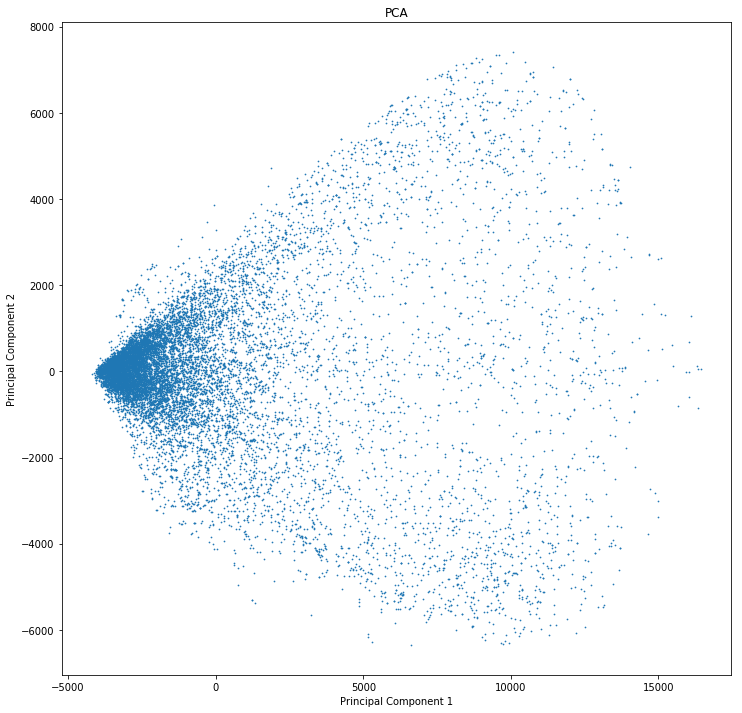

In [351]:
fig, ax = plt.subplots(1,1,figsize=(12,12))

ax.set(title='PCA',xlabel='Principal Component 1',ylabel='Principal Component 2')
plt.scatter(principal_components[:,0],principal_components[:,1],s=.5)
plt.show()

(307200,)


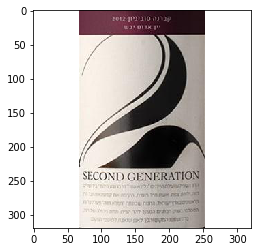

In [341]:
import os
from skimage.transform import resize
from skimage import io
from PIL import Image, ImageOps
filepath = '../images/'
file = '1848 Winery Cabernet Sauvignon Merlot Second Generation 2016.jpg'
image = Image.open(os.path.join(filepath,file))
desired_size = 320
ratio = desired_size/max(old_size)
old_size = image.size
new_size = ([int(x*ratio) for x in old_size])
image = image.resize(new_size,Image.ANTIALIAS)
image_resized = Image.new("RGB", (desired_size, desired_size),(255,255,255))
image_resized.paste(image, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
image_resized = np.array(image_resized)
print(image_resized.ravel().shape)

plt.imshow(image_resized)
plt.show()

(185, 320)


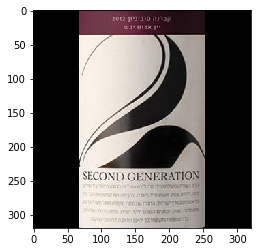

In [319]:
from PIL import Image, ImageOps

desired_size = 320

im = Image.open(os.path.join(filepath,file))
old_size = im.size  # old_size[0] is in (width, height) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
# use thumbnail() or resize() method to resize the input image

# thumbnail is a in-place operation

# im.thumbnail(new_size, Image.ANTIALIAS)
print(new_size)

im = im.resize(new_size, Image.ANTIALIAS)
# create a new image and paste the resized on it

new_im = Image.new("RGB", (desired_size, desired_size))
new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))

plt.imshow(new_im)

In [639]:
df = pd.read_csv('../data/cleaned_data.csv')

In [640]:
df.head()

,Unnamed: 0,name,url,varietal,origin,rating_dict,avg_rating,rating_count,page,red,white,sparking,collectible,giftable,green,screwcap,boutique,price,price_bins
0,2,Saracco Moscato d'Asti 2018,/product/saracco-moscato-dasti-2018/517853,Muscat,Italy,{'V': '94'},4.3,9,2,0,1,0,0,0,0,0,0.0,17.99,<20
1,3,Chateau Cote de Baleau 2015,/product/chateau-cote-de-baleau-2015/158294,Bordeaux Red Blends,France,"{'RP': '94', 'WS': '92', 'JS': '92'}",4.4,20,2,1,0,0,0,0,0,0,0.0,31.99,20-50
2,4,Chateau Sansonnet 2015,/product/chateau-sansonnet-2015/400828,Bordeaux Red Blends,France,"{'JS': '96', 'JD': '94', 'WS': '92', 'RP': '92', 'D': '92', 'WE': '92'}",4.0,14,2,1,0,0,0,0,0,0,0.0,39.99,20-50
3,5,Chateau Pichon-Longueville Baron 2016,/product/chateau-pichon-longueville-baron-2016/202515,Bordeaux Red Blends,France,"{'JS': '99', 'RP': '97', 'WE': '97', 'JD': '97', 'D': '96', 'WS': '96'}",4.6,7,2,1,0,0,1,0,0,0,0.0,179.99,100+
4,6,Foxen Bien Nacido Block Eight Pinot Noir 2015,/product/foxen-bien-nacido-block-eight-pinot-noir-2015/508780,Pinot Noir,California,"{'WE': '96', 'RP': '93', 'JD': '92'}",4.3,6,2,1,0,0,0,0,0,0,0.0,64.99,50-100


In [405]:
df.drop(['Unnamed: 0','url','avg_rating','rating_count','page','rating_dict'],axis=1,inplace = True)

In [408]:
df.head()

,name,varietal,origin,red,white,sparking,collectible,giftable,green,screwcap,boutique,price,price_bins
0,Saracco Moscato d'Asti 2018,Muscat,"Asti, Piedmont, Italy",0,1,0,0,0,0,0,0.0,17.99,<20
1,Chateau Cote de Baleau 2015,Bordeaux Red Blends,"St. Emilion, Bordeaux, France",1,0,0,0,0,0,0,0.0,31.99,20-50
2,Chateau Sansonnet 2015,Bordeaux Red Blends,"St. Emilion, Bordeaux, France",1,0,0,0,0,0,0,0.0,39.99,20-50
3,Chateau Pichon-Longueville Baron 2016,Bordeaux Red Blends,"Pauillac, Bordeaux, France",1,0,0,1,0,0,0,0.0,179.99,100+
4,Foxen Bien Nacido Block Eight Pinot Noir 2015,Pinot Noir,"Santa Maria Valley, Central Coast, California",1,0,0,0,0,0,0,0.0,64.99,50-100


In [409]:
# California|France|Italy|Oregon|South Africa|Spain|Australia|Washington|Japan|Austria|Greece|Portugal|Chile|Argentina|New Zealand|Uruguay|Other U.S.|Germany|Hungary|Canada|Israel|England|Croatia|Lebanon|Slovenia|Macedonia|China'

def str_replace_in_column(col,str_lst):
    for i in str_lst:
        df[col][df[col].str.contains(i)] = i


In [410]:
col = 'origin'
str_lst = ['California','France','Italy','Oregon','South Africa','Spain','Australia','Washington','Japan','Austria','Greece','Portugal','Chile','Argentina','New Zealand','Uruguay','Other U.S.','Germany','Hungary','Canada','Israel','England','Croatia','Lebanon','Slovenia','Macedonia','China']
str_replace_in_column(col,str_lst)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [411]:
len(df.origin.unique())

27

In [412]:
len(df.varietal.unique())

98

In [413]:
df

,name,varietal,origin,red,white,sparking,collectible,giftable,green,screwcap,boutique,price,price_bins
0,Saracco Moscato d'Asti 2018,Muscat,Italy,0,1,0,0,0,0,0,0.0,17.99,<20
1,Chateau Cote de Baleau 2015,Bordeaux Red Blends,France,1,0,0,0,0,0,0,0.0,31.99,20-50
2,Chateau Sansonnet 2015,Bordeaux Red Blends,France,1,0,0,0,0,0,0,0.0,39.99,20-50
3,Chateau Pichon-Longueville Baron 2016,Bordeaux Red Blends,France,1,0,0,1,0,0,0,0.0,179.99,100+
4,Foxen Bien Nacido Block Eight Pinot Noir 2015,Pinot Noir,California,1,0,0,0,0,0,0,0.0,64.99,50-100
5,Chateau Malartic-Lagraviere 2014,Bordeaux Red Blends,France,1,0,0,0,0,0,0,0.0,54.99,50-100
6,Hall Eighteen Seventy-Three Cabernet Sauvignon 2014,Cabernet Sauvignon,California,1,0,0,0,0,0,0,0.0,80.00,50-100
7,La Posta Pizzella Family Vineyard Malbec 2017,Malbec,Argentina,1,0,0,0,0,0,0,0.0,18.00,<20
8,Numanthia Termes 2015,Tempranillo,Spain,1,0,0,0,0,0,0,0.0,25.99,20-50
9,Mount Eden Vineyards Estate Cabernet Sauvignon 2014,Cabernet Sauvignon,California,1,0,0,1,0,0,0,0.0,79.99,50-100


In [667]:
df = df[df.origin != 'England']

In [686]:
df = pd.read_csv('../data/50x50/sorted_df.csv')

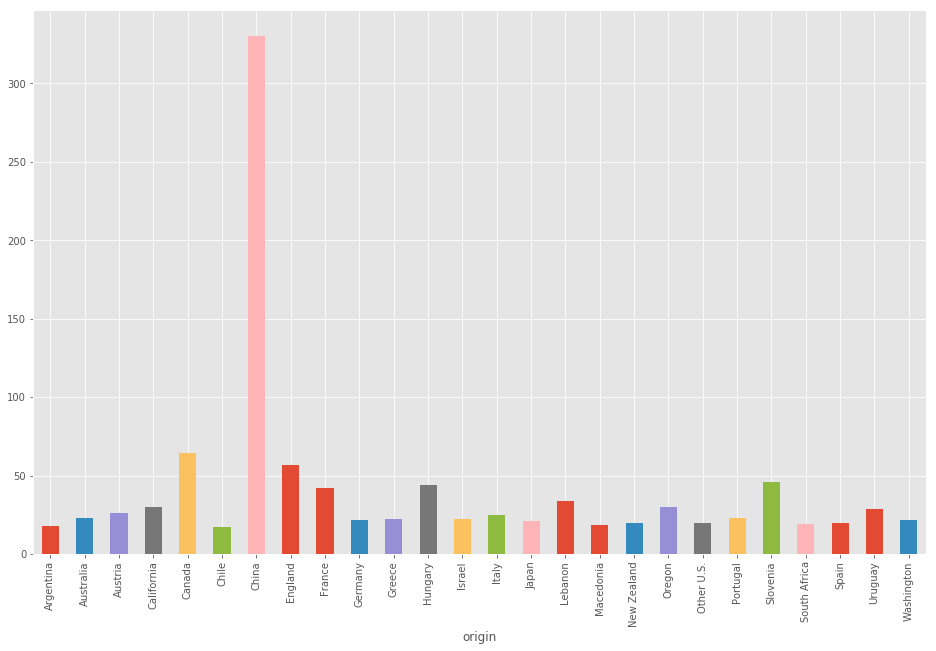

In [690]:
fig, ax = plt.subplots(1,1,figsize=(16,10))


means = df.groupby('origin')['price'].median()
means_df = pd.DataFrame(means)
means.plot.bar()

In [689]:
df[df['origin'] == 'England']

,name,url,varietal,origin,rating_dict,avg_rating,rating_count,page,red,white,...,price,price_bins,pc1,pc2,pc3,pc4,pc5,pc6,pc7,kmeans_label
2550,Hattingley Valley Classic Reserve,/product/hattingley-valley-classic-reserve/214404,Non-Vintage Sparkling Wine,England,"{'WE': '92', 'WW': '91'}",0.0,0,189,0,0,...,49.99,20-50,-16.170958,-1.210262,-0.638393,-0.173427,0.345049,-1.625744,0.599709,1
3805,Nyetimber Classic Cuvee,/product/nyetimber-classic-cuvee/335292,Non-Vintage Sparkling Wine,England,"{'WE': '93', 'RP': '90'}",0.0,0,333,0,0,...,69.99,50-100,-14.547473,-1.209356,-1.880413,1.153845,-0.991909,-0.725516,-1.372926,1
3814,Hattingley Valley Rose 2014,/product/hattingley-valley-rose-2014/404950,Rosé Sparkling Wine,England,"{'RP': '92', 'WE': '91'}",0.0,0,599,0,0,...,64.99,50-100,8.653317,-5.498739,1.184417,6.738489,-1.272706,-1.166130,0.919585,2
5381,Chapel Down Brut Classic,/product/chapel-down-brut-classic/392938,Non-Vintage Sparkling Wine,England,{'D': '90'},0.0,0,357,0,0,...,47.99,20-50,8.706125,-6.252443,-2.092469,28.877014,-6.532023,-4.331695,-7.771175,2
5651,Ridgeview Wine Estate Blanc de Noir 2013,/product/ridgeview-wine-estate-blanc-de-noir-2013/430061,Vintage Sparkling Wine,England,"{'RP': '92', 'WE': '91'}",0.0,0,319,0,0,...,66.99,50-100,13.954538,-3.412006,-4.012969,0.915604,-1.436319,-3.276172,0.884571,2
5788,Chapel Down Brut Rose,/product/chapel-down-brut-rose/392939,Rosé Sparkling Wine,England,{},0.0,0,226,0,0,...,56.99,50-100,2.963129,-2.889086,10.282547,-12.136079,1.423662,-1.187703,-10.560993,2
6148,Gusbourne Brut Reserve 2013,/product/gusbourne-brut-reserve-2013/306964,Vintage Sparkling Wine,England,"{'WW': '94', 'WE': '93', 'W&S': '90'}",0.0,0,110,0,0,...,49.99,20-50,1.532783,-0.132461,5.372750,0.865403,-0.161210,-3.511371,-2.476591,2
6656,Chapel Down Three Graces Brut 2011,/product/chapel-down-three-graces-brut-2011/392940,Vintage Sparkling Wine,England,{},0.0,0,235,0,0,...,65.99,50-100,10.545150,-1.510383,6.725973,0.780220,0.394785,-0.236595,0.127614,2
7709,Ridgeview Wine Estate Cavendish Brut 2014,/product/ridgeview-wine-estate-cavendish-brut-2014/374755,Vintage Sparkling Wine,England,{},0.0,0,395,0,0,...,52.99,50-100,-4.118127,1.053043,5.591028,2.440075,1.286839,6.286913,0.332825,2


In [465]:
subset = df[['red', 'white', 'sparking', 'collectible',
       'giftable', 'green', 'screwcap', 'boutique', 'price', 'price_bins']]

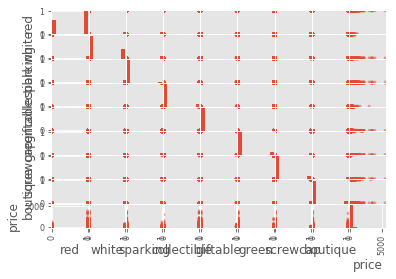

In [476]:
pd.plotting.scatter_matrix(subset);

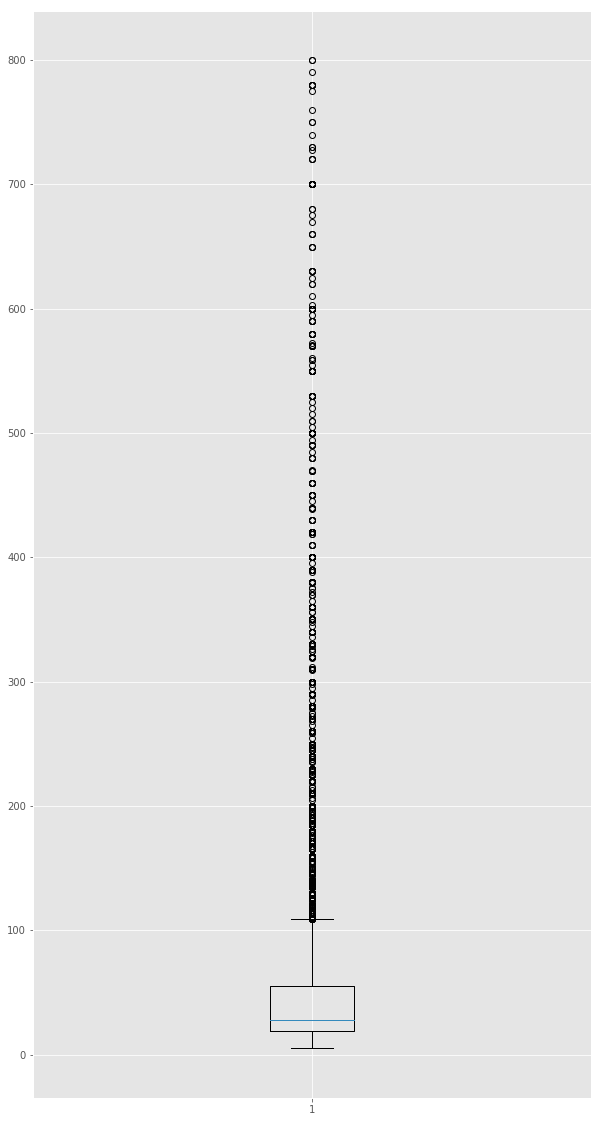

In [486]:
fig, ax = plt.subplots(1,1,figsize=(10,20))

plt.boxplot(df['price'][df['price']<800]);

In [491]:
len(df['price'][df['price']<800])

14512

In [682]:
df.describe()

,Unnamed: 0,avg_rating,rating_count,page,red,white,sparking,collectible,giftable,green,screwcap,boutique,price
count,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000,14583.000000
mean,7866.244600,0.701282,3.413015,304.190427,0.608928,0.288487,0.049441,0.095385,0.004320,0.120346,0.117877,0.114517,62.206524
std,4554.748775,1.544510,15.093431,178.557115,0.488007,0.453074,0.216795,0.293756,0.065588,0.325376,0.322473,0.318449,145.164877
min,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.970000
25%,4144.500000,0.000000,0.000000,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.990000
50%,7848.000000,0.000000,0.000000,299.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.990000
75%,11694.500000,0.000000,0.000000,455.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.990000
max,16503.000000,5.000000,523.000000,649.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5499.970000


In [510]:
df = pd.read_csv('../data/50x50/sorted_df.csv')

In [511]:
df

,Unnamed: 0,Unnamed: 0.1,name,url,varietal,origin,rating_dict,avg_rating,rating_count,page,...,sparking,collectible,giftable,green,screwcap,boutique,price,price_bins,pc1,pc2
0,0,0,David Arthur Three Acre Cabernet Sauvignon 2015,/product/david-arthur-three-acre-cabernet-sauvignon-2015/509887,Cabernet Sauvignon,"Napa Valley, California","{'JS': '95', 'V': '92'}",0.0,0,438,...,0,0,0,0,0,1.0,144.99,100+,7.047923,-1.753310
1,1,1,Powell & Son Barossa Valley Shiraz 2016,/product/powell-and-son-barossa-valley-shiraz-2016/521399,Syrah/Shiraz,"Barossa Valley, Barossa, Australia","{'WS': '92', 'RP': '91'}",0.0,0,190,...,0,0,0,0,0,0.0,31.99,20-50,-15.601621,-3.117246
2,2,2,Folk Machine Pinot Noir 2017,/product/folk-machine-pinot-noir-2017/414627,Pinot Noir,"Central Coast, California",{},0.0,0,416,...,0,0,0,1,0,0.0,23.99,20-50,27.620353,-1.302648
3,3,3,Chateau de Sancerre Blanc 2017,/product/chateau-de-sancerre-blanc-2017/513845,Sauvignon Blanc,"Sancerre, Loire, France",{},4.9,6,32,...,0,0,0,0,0,0.0,25.99,20-50,-10.473343,-1.613456
4,4,4,Mt. Beautiful Pinot Noir 2016,/product/mt-beautiful-pinot-noir-2016/490860,Pinot Noir,"Canterbury, New Zealand","{'D': '92', 'WS': '91'}",0.0,0,117,...,0,0,0,1,1,0.0,31.99,20-50,-15.818228,-0.225113
5,5,5,Seven Daughters Pinot Noir 2016,/product/seven-daughters-pinot-noir-2016/393246,Pinot Noir,California,{},0.0,0,481,...,0,0,0,0,0,0.0,13.99,<20,39.795913,0.572354
6,6,6,Chateau Canon La Gaffeliere (Futures Pre-Sale) 2017,/product/chateau-canon-la-gaffeliere-futures-pre-sale-2017/422645,Bordeaux Red Blends,"St. Emilion, Bordeaux, France","{'JS': '95', 'V': '95', 'JD': '94', 'WS': '93', 'RP': '93', 'TA': '93', 'D': '90'}",0.0,0,150,...,0,1,0,1,0,0.0,79.97,50-100,-6.465343,3.897408
7,7,7,Domaine Faiveley Vosne Romanee 2014,/product/domaine-faiveley-vosne-romanee-2014/354987,Pinot Noir,"Vosne-Romanee, Cote de Nuits, Cote d'Or, Burgundy, France",{'WS': '93'},0.0,0,460,...,0,0,0,0,0,0.0,105.00,100+,-15.846244,0.354508
8,8,8,Lapostolle Cuvee Alexandre Chardonnay 2016,/product/lapostolle-cuvee-alexandre-chardonnay-2016/520938,Chardonnay,"Casablanca Valley, Chile","{'JS': '93', 'TA': '90', 'RP': '90'}",0.0,0,46,...,0,0,0,0,0,0.0,24.00,20-50,-11.001418,-1.616872
9,9,9,Chateau Canon (Futures Pre-Sale) 2018,/product/chateau-canon-futures-pre-sale-2018/520389,Bordeaux Red Blends,"St. Emilion, Bordeaux, France","{'WS': '99', 'JS': '99', 'RP': '99', 'JD': '98', 'WE': '97', 'D': '97'}",0.0,0,35,...,0,1,0,0,0,0.0,129.97,100+,-9.831829,4.217090


In [613]:
df = pd.read_csv('../data/50x50/sorted_df.csv')
df

,Unnamed: 0,Unnamed: 0.1,name,url,varietal,origin,rating_dict,avg_rating,rating_count,page,...,sparking,collectible,giftable,green,screwcap,boutique,price,price_bins,pc1,pc2
0,0,0,David Arthur Three Acre Cabernet Sauvignon 2015,/product/david-arthur-three-acre-cabernet-sauvignon-2015/509887,Cabernet Sauvignon,California,"{'JS': '95', 'V': '92'}",0.0,0,438,...,0,0,0,0,0,1.0,144.99,100+,7.047923,-1.753310
1,1,1,Powell & Son Barossa Valley Shiraz 2016,/product/powell-and-son-barossa-valley-shiraz-2016/521399,Syrah/Shiraz,Australia,"{'WS': '92', 'RP': '91'}",0.0,0,190,...,0,0,0,0,0,0.0,31.99,20-50,-15.601621,-3.117246
2,2,2,Folk Machine Pinot Noir 2017,/product/folk-machine-pinot-noir-2017/414627,Pinot Noir,California,{},0.0,0,416,...,0,0,0,1,0,0.0,23.99,20-50,27.620353,-1.302648
3,3,3,Chateau de Sancerre Blanc 2017,/product/chateau-de-sancerre-blanc-2017/513845,Sauvignon Blanc,France,{},4.9,6,32,...,0,0,0,0,0,0.0,25.99,20-50,-10.473343,-1.613456
4,4,4,Mt. Beautiful Pinot Noir 2016,/product/mt-beautiful-pinot-noir-2016/490860,Pinot Noir,New Zealand,"{'D': '92', 'WS': '91'}",0.0,0,117,...,0,0,0,1,1,0.0,31.99,20-50,-15.818228,-0.225113
5,5,5,Seven Daughters Pinot Noir 2016,/product/seven-daughters-pinot-noir-2016/393246,Pinot Noir,California,{},0.0,0,481,...,0,0,0,0,0,0.0,13.99,<20,39.795913,0.572354
6,6,6,Chateau Canon La Gaffeliere (Futures Pre-Sale) 2017,/product/chateau-canon-la-gaffeliere-futures-pre-sale-2017/422645,Bordeaux Red Blends,France,"{'JS': '95', 'V': '95', 'JD': '94', 'WS': '93', 'RP': '93', 'TA': '93', 'D': '90'}",0.0,0,150,...,0,1,0,1,0,0.0,79.97,50-100,-6.465343,3.897408
7,7,7,Domaine Faiveley Vosne Romanee 2014,/product/domaine-faiveley-vosne-romanee-2014/354987,Pinot Noir,France,{'WS': '93'},0.0,0,460,...,0,0,0,0,0,0.0,105.00,100+,-15.846244,0.354508
8,8,8,Lapostolle Cuvee Alexandre Chardonnay 2016,/product/lapostolle-cuvee-alexandre-chardonnay-2016/520938,Chardonnay,Chile,"{'JS': '93', 'TA': '90', 'RP': '90'}",0.0,0,46,...,0,0,0,0,0,0.0,24.00,20-50,-11.001418,-1.616872
9,9,9,Chateau Canon (Futures Pre-Sale) 2018,/product/chateau-canon-futures-pre-sale-2018/520389,Bordeaux Red Blends,France,"{'WS': '99', 'JS': '99', 'RP': '99', 'JD': '98', 'WE': '97', 'D': '97'}",0.0,0,35,...,0,1,0,0,0,0.0,129.97,100+,-9.831829,4.217090


In [582]:
df.drop(['Unnamed: 0','Unnamed: 0.1','url','avg_rating','rating_count','page','rating_dict','price_bins'],axis=1,inplace = True)

In [580]:
col = 'origin'
str_lst = ['California','France','Italy','Oregon','South Africa','Spain','Australia','Washington','Japan','Austria','Greece','Portugal','Chile','Argentina','New Zealand','Uruguay','Other U.S.','Germany','Hungary','Canada','Israel','England','Croatia','Lebanon','Slovenia','Macedonia','China']
    
for i in str_lst:
    df[col][df[col].str.contains(i)] = i

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [581]:
df

,Unnamed: 0,Unnamed: 0.1,name,url,varietal,origin,rating_dict,avg_rating,rating_count,page,...,sparking,collectible,giftable,green,screwcap,boutique,price,price_bins,pc1,pc2
0,0,0,David Arthur Three Acre Cabernet Sauvignon 2015,/product/david-arthur-three-acre-cabernet-sauvignon-2015/509887,Cabernet Sauvignon,California,"{'JS': '95', 'V': '92'}",0.0,0,438,...,0,0,0,0,0,1.0,144.99,100+,7.047923,-1.753310
1,1,1,Powell & Son Barossa Valley Shiraz 2016,/product/powell-and-son-barossa-valley-shiraz-2016/521399,Syrah/Shiraz,Australia,"{'WS': '92', 'RP': '91'}",0.0,0,190,...,0,0,0,0,0,0.0,31.99,20-50,-15.601621,-3.117246
2,2,2,Folk Machine Pinot Noir 2017,/product/folk-machine-pinot-noir-2017/414627,Pinot Noir,California,{},0.0,0,416,...,0,0,0,1,0,0.0,23.99,20-50,27.620353,-1.302648
3,3,3,Chateau de Sancerre Blanc 2017,/product/chateau-de-sancerre-blanc-2017/513845,Sauvignon Blanc,France,{},4.9,6,32,...,0,0,0,0,0,0.0,25.99,20-50,-10.473343,-1.613456
4,4,4,Mt. Beautiful Pinot Noir 2016,/product/mt-beautiful-pinot-noir-2016/490860,Pinot Noir,New Zealand,"{'D': '92', 'WS': '91'}",0.0,0,117,...,0,0,0,1,1,0.0,31.99,20-50,-15.818228,-0.225113
5,5,5,Seven Daughters Pinot Noir 2016,/product/seven-daughters-pinot-noir-2016/393246,Pinot Noir,California,{},0.0,0,481,...,0,0,0,0,0,0.0,13.99,<20,39.795913,0.572354
6,6,6,Chateau Canon La Gaffeliere (Futures Pre-Sale) 2017,/product/chateau-canon-la-gaffeliere-futures-pre-sale-2017/422645,Bordeaux Red Blends,France,"{'JS': '95', 'V': '95', 'JD': '94', 'WS': '93', 'RP': '93', 'TA': '93', 'D': '90'}",0.0,0,150,...,0,1,0,1,0,0.0,79.97,50-100,-6.465343,3.897408
7,7,7,Domaine Faiveley Vosne Romanee 2014,/product/domaine-faiveley-vosne-romanee-2014/354987,Pinot Noir,France,{'WS': '93'},0.0,0,460,...,0,0,0,0,0,0.0,105.00,100+,-15.846244,0.354508
8,8,8,Lapostolle Cuvee Alexandre Chardonnay 2016,/product/lapostolle-cuvee-alexandre-chardonnay-2016/520938,Chardonnay,Chile,"{'JS': '93', 'TA': '90', 'RP': '90'}",0.0,0,46,...,0,0,0,0,0,0.0,24.00,20-50,-11.001418,-1.616872
9,9,9,Chateau Canon (Futures Pre-Sale) 2018,/product/chateau-canon-futures-pre-sale-2018/520389,Bordeaux Red Blends,France,"{'WS': '99', 'JS': '99', 'RP': '99', 'JD': '98', 'WE': '97', 'D': '97'}",0.0,0,35,...,0,1,0,0,0,0.0,129.97,100+,-9.831829,4.217090


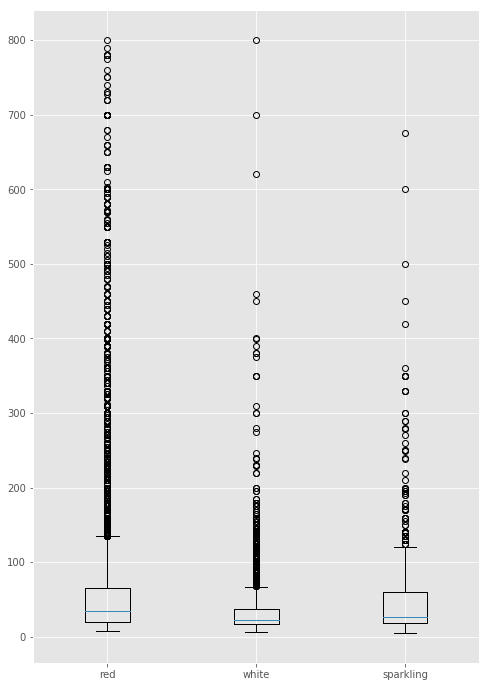

In [617]:
fig, ax = plt.subplots(figsize=(8,12))
df_red = df[df['red']==1]
df_white = df[df['white']==1]
df_sparkling = df[df['sparking']==1]
plt.boxplot(x = [df_red['price'],df_white['price'],df_sparkling['price']])
plt.xticks([1, 2, 3], ['red','white','sparkling'])
plt.show()

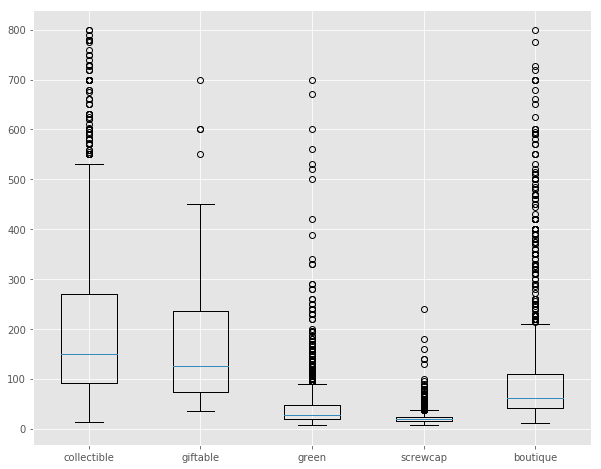

In [615]:
fig, ax = plt.subplots(figsize=(10,8))
df_collectible = df[df['collectible']==1]
df_giftable = df[df['giftable']==1]
df_green = df[df['green']==1]
df_screwcap = df[df['screwcap']==1]
df_boutique = df[df['boutique']==1]
plt.boxplot(x = [df_collectible['price'],df_giftable['price'],df_green['price'],df_screwcap['price'],df_boutique['price']])
plt.xticks([1, 2, 3, 4, 5], ['collectible','giftable','green','screwcap','boutique'])
plt.show()


In [579]:
print(df.groupby('varietal').median()['price'])

varietal
Aglianico                 28.000
Albarino                  19.990
Aligote                   19.990
Arneis                    20.990
Assyrtiko                 27.990
Barbera                   23.490
Blaufrankisch             25.490
Bonarda                   17.990
Bordeaux Red Blends       64.970
Bordeaux White Blends     27.980
Cabernet Franc            29.990
Cabernet Sauvignon        38.990
Carignan                  29.990
Carmenere                 19.990
Chardonnay                30.000
Chenin Blanc              22.990
Cinsault                  35.000
Cortese                   19.990
Corvina                   26.495
Dolcetto                  21.490
Falanghina                17.490
Friulano                  27.990
Fruit Wine                16.495
Furmint                   24.990
Gamay                     24.990
Garganega                 19.990
Gewurztraminer            24.990
Godello                   19.990
Grechetto                 19.990
Greco                     21.990
 

In [608]:
1800+1764+1353+1201+828+600

7546

In [578]:
df.varietal.value_counts()

Pinot Noir                    1809
Chardonnay                    1764
Cabernet Sauvignon            1353
Bordeaux Red Blends           1201
Other Red Blends              828 
Sauvignon Blanc               600 
Syrah/Shiraz                  437 
Sangiovese                    412 
Rhone Red Blends              401 
Rosé                          400 
Non-Vintage Sparkling Wine    385 
Riesling                      313 
Tempranillo                   300 
Nebbiolo                      285 
Merlot                        285 
Pinot Gris/Grigio             284 
Malbec                        267 
Other White Blends            259 
Zinfandel                     252 
Rosé Sparkling Wine           185 
Vintage Sparkling Wine        140 
Port                          129 
Other Dessert                 124 
Other White Wine              123 
Other Red Wine                116 
Grenache                      114 
Cabernet Franc                104 
Rhone White Blends            100 
Chenin Blanc        

In [587]:
df.drop('name',axis=1,inplace = True)

In [590]:
df.head()

,varietal,origin,red,white,sparking,collectible,giftable,green,screwcap,boutique,price,pc1,pc2
0,Cabernet Sauvignon,California,1,0,0,0,0,0,0,1.0,144.99,7.047923,-1.753310
1,Syrah/Shiraz,Australia,1,0,0,0,0,0,0,0.0,31.99,-15.601621,-3.117246
2,Pinot Noir,California,1,0,0,0,0,1,0,0.0,23.99,27.620353,-1.302648
3,Sauvignon Blanc,France,0,1,0,0,0,0,0,0.0,25.99,-10.473343,-1.613456
4,Pinot Noir,New Zealand,1,0,0,0,0,1,1,0.0,31.99,-15.818228,-0.225113


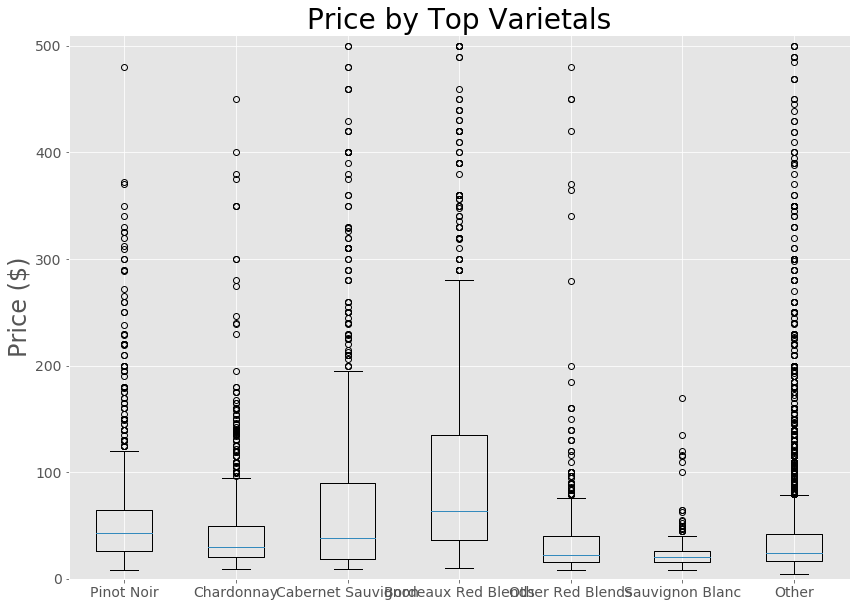

In [735]:
fig, ax = plt.subplots(figsize=(14,10))
pinot_noir = df[df['varietal']=='Pinot Noir']
chardonnay = df[df['varietal']== 'Chardonnay']
cab_sauv = df[df['varietal']=='Cabernet Sauvignon']
bordeaux_reds = df[df['varietal']=='Bordeaux Red Blends']
other_reds = df[df['varietal']== 'Other Red Blends']
sauv_blanc = df[df['varietal']== 'Sauvignon Blanc']
other = df[~df['varietal'].isin(['Pinot Noir','Chardonnay','Cabernet Sauvignon','Bordeaux Red Blends','Other Red Blends','Sauvignon Blanc'])]
plt.boxplot(x = [pinot_noir['price'],chardonnay['price'],cab_sauv['price'],bordeaux_reds['price'],other_reds['price'],sauv_blanc['price'],other['price']])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Pinot Noir','Chardonnay','Cabernet Sauvignon','Bordeaux Red Blends','Other Red Blends','Sauvignon Blanc','Other'],fontsize=14)
plt.yticks(fontsize = 14)
plt.ylabel('Price ($)',fontsize=24)
plt.title('Price by Top Varietals',fontsize = 28)
plt.ylim(0,510)
plt.savefig('../figures/price_by_region.jpg')
plt.show()
plt.show()

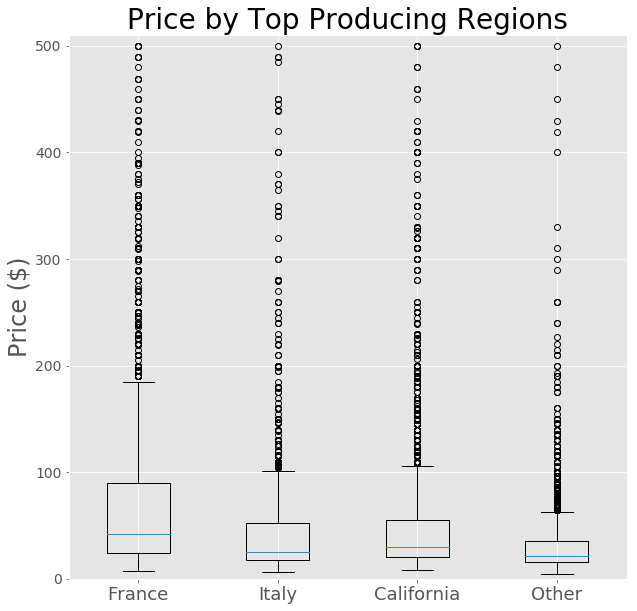

In [732]:
fig, ax = plt.subplots(figsize=(10,10))
france = df[df['origin']=='France']
italy = df[df['origin']== 'Italy']
california = df[df['origin']=='California']
other = df[~df['origin'].isin(['France','Italy','California','Other'])]
plt.boxplot(x = [france['price'],italy['price'],california['price'],other['price']])
plt.xticks([1, 2, 3, 4], ['France','Italy','California','Other'],fontsize=18)
plt.yticks(fontsize = 14)
plt.ylabel('Price ($)',fontsize=24)
plt.title('Price by Top Producing Regions',fontsize = 28)
plt.ylim(0,510)
plt.savefig('../figures/price_by_region.jpg')
plt.show()

In [679]:
df['origin'].where(df['origin'].isin(['France', 'Italy','California']), 'Other', inplace=True)

In [680]:
df.head(20)

,Unnamed: 0,name,url,varietal,origin,rating_dict,avg_rating,rating_count,page,red,...,sparking,collectible,giftable,green,screwcap,boutique,price,price_bins,Class,Other
0,2,Saracco Moscato d'Asti 2018,/product/saracco-moscato-dasti-2018/517853,Muscat,Italy,{'V': '94'},4.3,9,2,0,...,0,0,0,0,0,0.0,17.99,<20,NaN,NaN
1,3,Chateau Cote de Baleau 2015,/product/chateau-cote-de-baleau-2015/158294,Bordeaux Red Blends,France,"{'RP': '94', 'WS': '92', 'JS': '92'}",4.4,20,2,1,...,0,0,0,0,0,0.0,31.99,20-50,NaN,NaN
2,4,Chateau Sansonnet 2015,/product/chateau-sansonnet-2015/400828,Bordeaux Red Blends,France,"{'JS': '96', 'JD': '94', 'WS': '92', 'RP': '92', 'D': '92', 'WE': '92'}",4.0,14,2,1,...,0,0,0,0,0,0.0,39.99,20-50,NaN,NaN
3,5,Chateau Pichon-Longueville Baron 2016,/product/chateau-pichon-longueville-baron-2016/202515,Bordeaux Red Blends,France,"{'JS': '99', 'RP': '97', 'WE': '97', 'JD': '97', 'D': '96', 'WS': '96'}",4.6,7,2,1,...,0,1,0,0,0,0.0,179.99,100+,NaN,NaN
4,6,Foxen Bien Nacido Block Eight Pinot Noir 2015,/product/foxen-bien-nacido-block-eight-pinot-noir-2015/508780,Pinot Noir,California,"{'WE': '96', 'RP': '93', 'JD': '92'}",4.3,6,2,1,...,0,0,0,0,0,0.0,64.99,50-100,NaN,NaN
5,7,Chateau Malartic-Lagraviere 2014,/product/chateau-malartic-lagraviere-2014/142829,Bordeaux Red Blends,France,"{'WE': '96', 'JS': '94', 'D': '93', 'WW': '93', 'RP': '92', 'TP': '92', 'WS': '91', 'JD': '91'}",4.3,8,2,1,...,0,0,0,0,0,0.0,54.99,50-100,NaN,NaN
6,8,Hall Eighteen Seventy-Three Cabernet Sauvignon 2014,/product/hall-eighteen-seventy-three-cabernet-sauvignon-2014/405545,Cabernet Sauvignon,California,"{'WW': '98', 'WE': '95'}",4.4,71,2,1,...,0,0,0,0,0,0.0,80.00,50-100,NaN,NaN
7,9,La Posta Pizzella Family Vineyard Malbec 2017,/product/la-posta-pizzella-family-vineyard-malbec-2017/516703,Malbec,Other,"{'JS': '93', 'RP': '90', 'TA': '90'}",3.9,19,2,1,...,0,0,0,0,0,0.0,18.00,<20,Other,Other
8,10,Numanthia Termes 2015,/product/numanthia-termes-2015/506070,Tempranillo,Other,"{'JS': '94', 'RP': '90'}",4.1,20,2,1,...,0,0,0,0,0,0.0,25.99,20-50,Other,Other
9,11,Mount Eden Vineyards Estate Cabernet Sauvignon 2014,/product/mount-eden-vineyards-estate-cabernet-sauvignon-2014/355924,Cabernet Sauvignon,California,"{'JD': '97', 'D': '96', 'W&S': '96', 'WW': '92', 'WE': '92'}",4.8,6,2,1,...,0,1,0,0,0,0.0,79.99,50-100,NaN,NaN


In [609]:
df.head()

,varietal,origin,red,white,sparking,collectible,giftable,green,screwcap,boutique,price,pc1,pc2
0,Cabernet Sauvignon,California,1,0,0,0,0,0,0,1.0,144.99,7.047923,-1.753310
1,Syrah/Shiraz,Australia,1,0,0,0,0,0,0,0.0,31.99,-15.601621,-3.117246
2,Pinot Noir,California,1,0,0,0,0,1,0,0.0,23.99,27.620353,-1.302648
3,Sauvignon Blanc,France,0,1,0,0,0,0,0,0.0,25.99,-10.473343,-1.613456
4,Pinot Noir,New Zealand,1,0,0,0,0,1,1,0.0,31.99,-15.818228,-0.225113


In [610]:
df = pd.get_dummies(df,columns=['varietal'])

In [611]:
df = pd.get_dummies(df, columns=['origin'])

In [618]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [622]:
df = pd.read_csv('../data/50x50/sorted_df.csv')
col_list = ['Unnamed: 0','Unnamed: 0.1','url','avg_rating','rating_count','page','rating_dict','price_bins','name','origin','varietal']

def drop_unneeded_columns(df,col_list):
    df.drop(col_list,axis=1,inplace=True)
    return df

df = drop_unneeded_columns(df,col_list)

In [636]:
X_train, X_test, y_train, y_test = train_test_split(df, y)

model = sm.OLS(y_train,sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     549.4
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:35:22   Log-Likelihood:                -10499.
No. Observations:               10883   AIC:                         2.103e+04
Df Residuals:                   10868   BIC:                         2.114e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2271      0.029    112.984      0.000       3.171       3.283
Unnamed: 0.1.1 -4.167e-07   1.44e-06     -0.289      0.773   -3.25e-06    2.41e-06
red                0.2581      0.028      9.323      0.000       0.204       0.312
white              0.0403      0.029      1.402      0.161      -0.016       0.097
sparking           0.2475      0.039      6.397      0.000       0.172       0.323
collectible        1.4140      0.022     63.567      0.000       1.370       1.458
giftable           0.4471      0.095      4.727      0.000       0.262       0.632
green              0.0062      0.019      0.333      0.739      -0.030       0.043
screwcap          -0.3906      0.019    -20.034      0.000      -0.429      -0.352
boutique           0.4712      0.020     23.766      0.000       0.432       0.510
pc1                0.0751      0.028      2.728      0.006       0.021       0.129
pc2            -2.488e+06   9.07e+05     -2.744      0.006   -4.27e+06   -7.11e+05
pc1.1             -0.0760      0.028     -2.761      0.006      -0.130      -0.022
pc2.1           2.488e+06   9.07e+05      2.744      0.006    7.11e+05    4.27e+06
pc3               -0.0061      0.001     -5.455      0.000      -0.008      -0.004
pc4                0.0018      0.001      1.402      0.161      -0.001       0.004
==============================================================================
Omnibus:                      821.982   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.485
Skew:                           0.676   Prob(JB):                    2.60e-232
Kurtosis:                       3.723   Cond. No.                     8.50e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [699]:
df.head()

,name,url,varietal,origin,rating_dict,avg_rating,rating_count,page,red,white,...,price,price_bins,pc1,pc2,pc3,pc4,pc5,pc6,pc7,kmeans_label
0,David Arthur Three Acre Cabernet Sauvignon 2015,/product/david-arthur-three-acre-cabernet-sauvignon-2015/509887,Cabernet Sauvignon,California,"{'JS': '95', 'V': '92'}",0.0,0,438,1,0,...,144.99,100+,-15.450718,-3.116433,-1.399562,3.661219,-0.959075,-2.405474,-1.545718,1
1,Powell & Son Barossa Valley Shiraz 2016,/product/powell-and-son-barossa-valley-shiraz-2016/521399,Syrah/Shiraz,Australia,"{'WS': '92', 'RP': '91'}",0.0,0,190,1,0,...,31.99,20-50,27.858537,-1.617555,15.876755,-3.968650,-14.416123,12.279822,-0.063393,0
2,Folk Machine Pinot Noir 2017,/product/folk-machine-pinot-noir-2017/414627,Pinot Noir,California,{},0.0,0,416,1,0,...,23.99,20-50,-10.323736,-1.606473,-0.880953,0.403652,1.591014,1.299578,4.611322,1
3,Chateau de Sancerre Blanc 2017,/product/chateau-de-sancerre-blanc-2017/513845,Sauvignon Blanc,France,{},4.9,6,32,0,1,...,25.99,20-50,-15.671072,-0.211590,-0.244940,-0.173910,0.183446,-1.954810,0.003819,1
4,Mt. Beautiful Pinot Noir 2016,/product/mt-beautiful-pinot-noir-2016/490860,Pinot Noir,New Zealand,"{'D': '92', 'WS': '91'}",0.0,0,117,1,0,...,31.99,20-50,40.011370,0.297703,18.986054,-6.149670,-0.663201,-0.539119,-4.768441,0


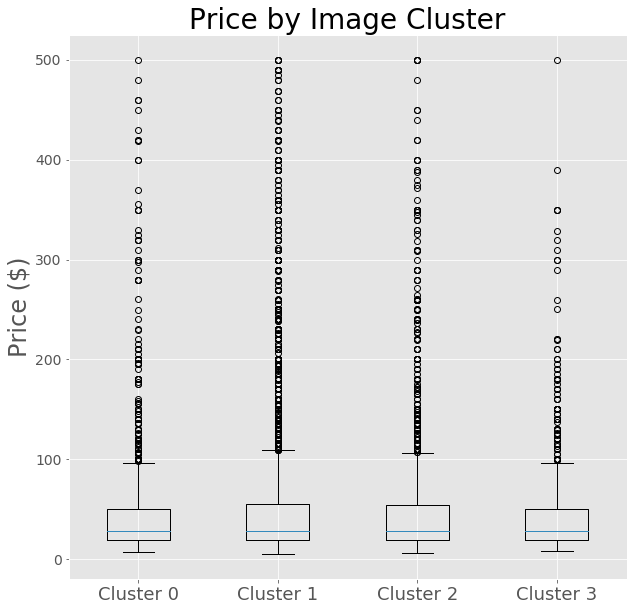

In [725]:
fig, ax = plt.subplots(figsize=(10,10))
zero = df[df['kmeans_label']==0]
one = df[df['kmeans_label']== 1]
two = df[df['kmeans_label']==2]
three = df[df['kmeans_label'] == 3]
plt.boxplot(x = [zero['price'],one['price'],two['price'],three['price']])
plt.xticks([1, 2, 3, 4], ['Cluster 0','Cluster 1','Cluster 2','Cluster 3'],fontsize=18)
plt.yticks(fontsize = 14)
plt.ylabel('Price ($)',fontsize=24)
plt.title('Price by Image Cluster',fontsize = 28)
plt.savefig('../figures/price_by_cluster.jpg')
plt.show()